In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 66.2MB 55kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn import multioutput
mor=multioutput.MultiOutputRegressor

In [ ]:
import pickle
from joblib import dump, load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "drive/My Drive/data.csv"
data = pd.read_csv(path)
path = "drive/My Drive/cvdata1.csv"
data = data.append(pd.read_csv(path))
path = "drive/My Drive/cvdata2.csv"
data = data.append(pd.read_csv(path))
path = "drive/My Drive/cvdata3.csv"
data = data.append(pd.read_csv(path))
path = "drive/My Drive/cvdata4.csv"
data2 = pd.read_csv(path)

In [ ]:
xcol=['H0','T0','B0','K']
ycol=[]
for temp in range(2500):
  ycol.append('Ts'+str(temp))
catcol=[]
for temp in ycol:
  if abs(data[temp]).sum(axis=0)==0:
    continue
  else:
    catcol.append(temp)
df=pd.DataFrame()
df[xcol]=(data[xcol]-data[xcol].mean())/(data[xcol].max()-data[xcol].min())
df[catcol]=(data[catcol]-data[catcol].mean())/(data[catcol].max()-data[catcol].min())
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(215, 2358)
(215, 2358)


In [ ]:
x=df[xcol].to_numpy()
y=df[catcol].to_numpy()

In [ ]:
reg=MLPRegressor(hidden_layer_sizes=(100,100,100,150,150))
reg.fit(x,y)
mean_absolute_error(reg.predict(x)*(data[catcol].max()-data[catcol].min()).to_numpy(),y*(data[catcol].max()-data[catcol].min()).to_numpy())

50.450348822512986

In [ ]:
CatBoostRegressor()

In [ ]:
rfr=RandomForestRegressor(n_estimators=300)
rfr.fit(data[xcol],data[ycol])
mean_absolute_error(rfr.predict(data[xcol]),data[ycol])

2.403280041968447

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',verbosity=1,n_estimators=300,learning_rate = 0.2)
xgbreg = mor(xgb_model).fit(data[xcol],data[ycol])
mean_absolute_error(xgbreg.predict(data[xcol]),data[ycol])

0.6685677530336845

In [ ]:
lgr=lgb.LGBMRegressor(verbosity=1,n_estimators=300,learning_rate = 0.2)
lgrm=mor(lgr).fit(data[xcol],data[ycol])
mean_absolute_error(lgrm.predict(data[xcol]),data[ycol])

1.8885517127723541

In [ ]:
cbr=CatBoostRegressor(silent=True)
data[ycol].sum(axis=1)
cbrm=mor(cbr).fit(data[xcol],data[catcol])
mean_absolute_error(cbrm.predict(data[xcol]),data[catcol])

0.8146488359966688

In [ ]:
df2=pd.DataFrame()
df2[xcol]=(data2[xcol]-data2[xcol].mean())/(data2[xcol].max()-data2[xcol].min())
df2[catcol]=(data2[catcol]-data2[catcol].mean())/(data2[catcol].max()-data2[catcol].min())
X=df2[xcol].to_numpy()
Y=df2[catcol].to_numpy()

In [ ]:
mean_absolute_error(reg.predict(X)*(data[catcol].max()-data[catcol].min()).to_numpy(),Y*(data[catcol].max()-data[catcol].min()).to_numpy())

24.383423173368698

In [ ]:
mean_absolute_error(rfr.predict(data2[xcol]),data2[ycol])

5.497352186298792

In [ ]:
mean_absolute_error(xgbreg.predict(data2[xcol]),data2[ycol])

9.069706631395464

In [ ]:
mean_absolute_error(lgrm.predict(data2[xcol]),data2[ycol])

8.977024906639999

In [ ]:
mean_absolute_error(cbrm.predict(data2[xcol]),data2[catcol])

5.370889934845092

In [ ]:
rfrp=rfr.predict(data2[xcol].iloc[[3]])
ts=data2[ycol].iloc[[3]].to_numpy()
rfrp=rfrp.reshape([50,50])
ts=ts.reshape([50,50])

In [ ]:
xax=np.arange(50)
yax=np.arange(50)
Xax, Yax = np.meshgrid(xax, yax)

In [ ]:
dump(cbrm,'CATBmodel.jb')

['CATBmodel.jb']

In [ ]:
!cp CATBmodel.jb "drive/My Drive/"

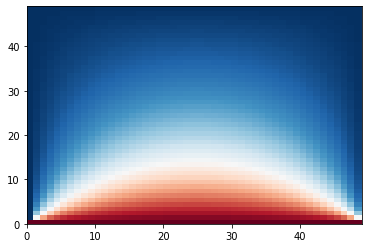

In [ ]:
surf = plt.pcolor(Xax, Yax, ts, cmap='RdBu_r',vmin=ts.min(), vmax=ts.max())

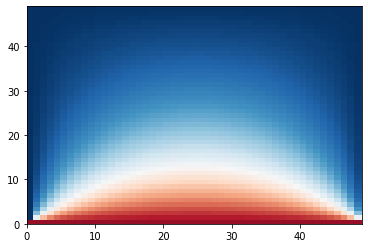

In [ ]:
surf = plt.pcolor(Xax, Yax, rfrp, cmap='RdBu_r',vmin=ts.min(), vmax=ts.max())

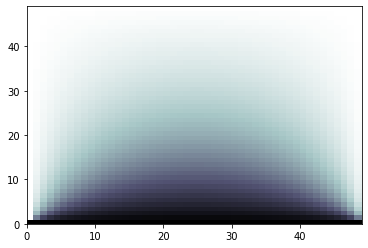

In [ ]:
surf = plt.pcolor(Xax, Yax, ts-rfrp, cmap='bone_r')

In [ ]:
print(abs(ts-rfrp).max())
print(abs(ts-rfrp).mean())

24.183333333333337
6.049228247737573
